# Exploratory Data Analysis

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [7]:
airtravel_df = pd.read_csv('../data/interim/airtravel_df.csv')

In [9]:
airtravel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   flightDate          object 
 1   startingAirport     object 
 2   searchDate          object 
 3   destinationAirport  object 
 4   totalFare           float64
 5   departureTimeRaw    object 
 6   cabinType           object 
 7   departuretime       object 
 8   time_category       object 
 9   adjusted_date       object 
 10  days_from_flight    object 
 11  day_of_week         int64  
 12  day_name            object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ GB


In [57]:
airtravel_df['adjusted_date'].max()

Timestamp('2022-07-18 00:00:00')

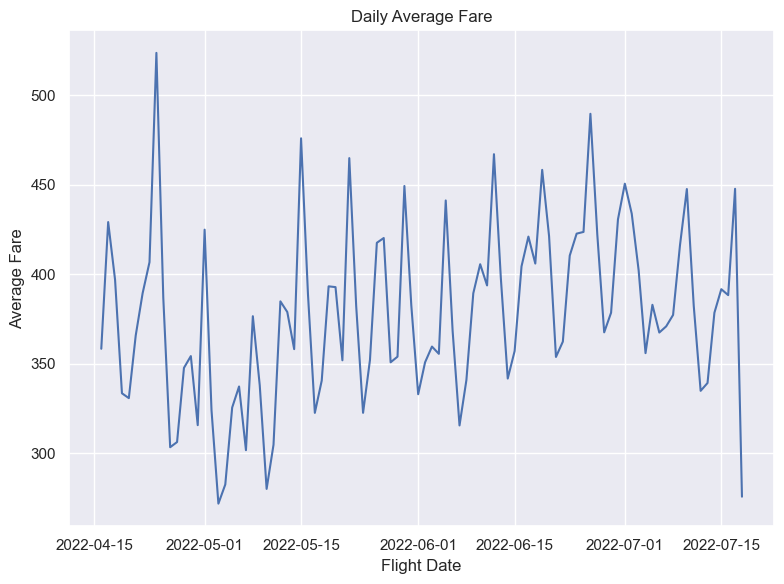

In [55]:
airtravel_df['adjusted_date'] = pd.to_datetime(airtravel_df['adjusted_date'])

# Calculate daily average fare
daily_avg_fare = airtravel_df.groupby('adjusted_date')['totalFare'].mean().reset_index()

# Set the style of the plot
sns.set(style="darkgrid")

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='adjusted_date', y='totalFare', data=daily_avg_fare)

# Set labels and title
plt.xlabel('Flight Date')
plt.ylabel('Average Fare')
plt.title('Daily Average Fare')

# Show the plot
plt.tight_layout()
plt.show()

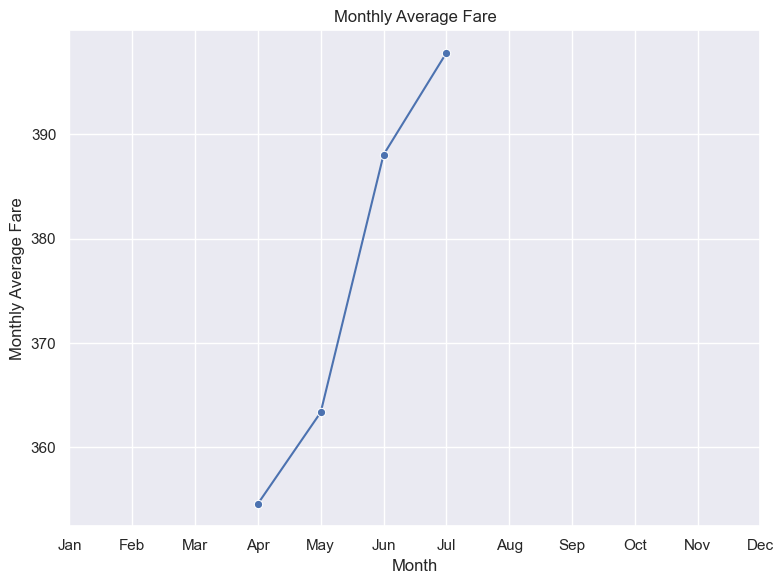

In [31]:
airtravel_df['adjusted_date'] = pd.to_datetime(airtravel_df['adjusted_date'])

# Extract month from 'flightDate' and create a new column 'month'
airtravel_df['month'] = airtravel_df['adjusted_date'].dt.month

# Calculate monthly average fare
monthly_avg_fare = airtravel_df.groupby('month')['totalFare'].mean().reset_index()

# Set the style of the plot
sns.set(style="darkgrid")

# Create a line plot for monthly average fare
plt.figure(figsize=(8, 6))
sns.lineplot(x='month', y='totalFare', data=monthly_avg_fare, marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Monthly Average Fare')
plt.title('Monthly Average Fare')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

# Show the plot
plt.tight_layout()
plt.show()


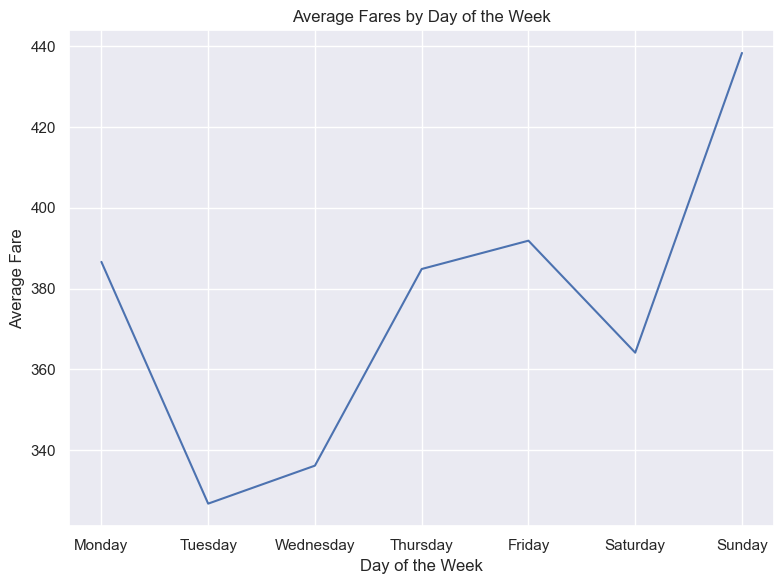

In [59]:
avg_fare_by_day = airtravel_df.groupby('day_name')['totalFare'].mean().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert day_name to categorical data type with custom sort order
avg_fare_by_day['day_name'] = pd.Categorical(avg_fare_by_day['day_name'], categories=day_order, ordered=True)

# Create a line plot for average fares by day_name
plt.figure(figsize=(8, 6))
sns.lineplot(x='day_name', y='totalFare', data=avg_fare_by_day)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare')
plt.title('Average Fares by Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


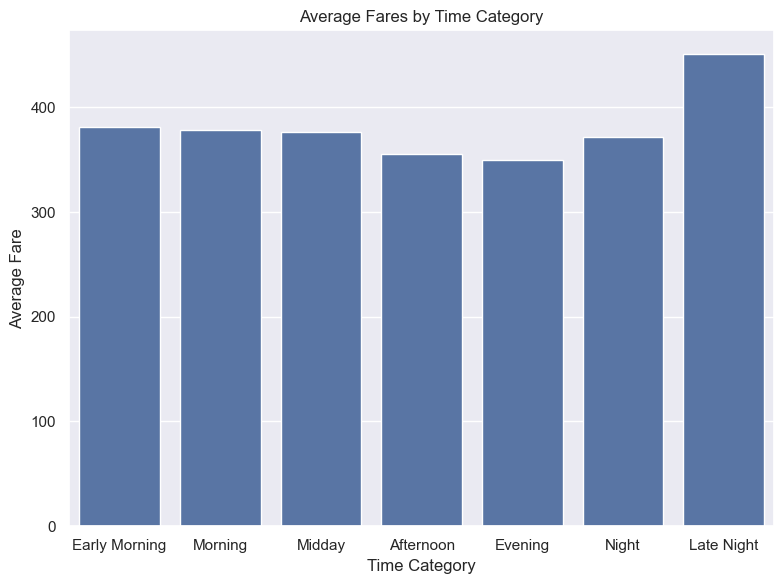

In [39]:
sns.set(style="darkgrid")

time_category_order = ['Early Morning', 'Morning', 'Midday', 'Afternoon', 'Evening', 'Night', 'Late Night']

# Calculate average fare for each time category
avg_fare_by_time_category = airtravel_df.groupby('time_category')['totalFare'].mean().reset_index()

# Create a bar plot for average fares by time category
plt.figure(figsize=(8, 6))
sns.barplot(x='time_category', y='totalFare', data=avg_fare_by_time_category, order=time_category_order)

# Set labels and title
plt.xlabel('Time Category')
plt.ylabel('Average Fare')
plt.title('Average Fares by Time Category')

# Show the plot
plt.tight_layout()
plt.show()

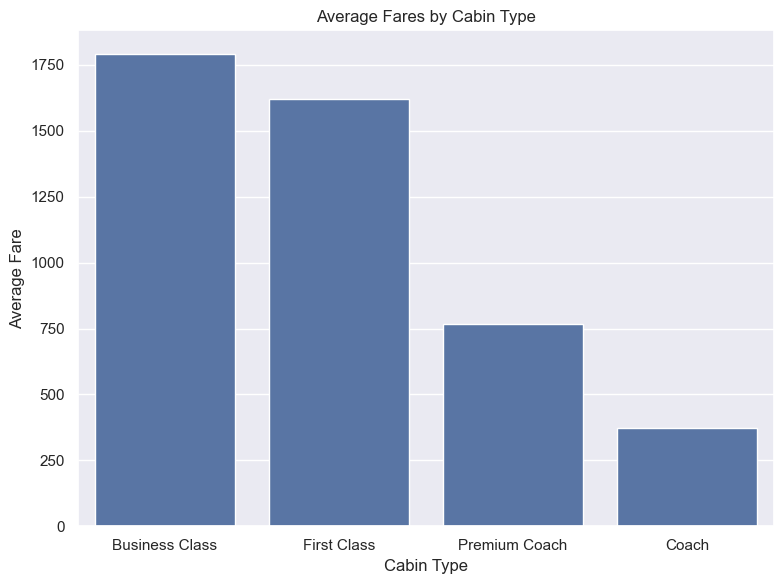

In [43]:
sns.set(style="darkgrid")

# Calculate average fare for each cabin type
avg_fare_by_cabin_type = airtravel_df.groupby('cabinType')['totalFare'].mean().reset_index()

avg_fare_by_cabin_type_sorted = avg_fare_by_cabin_type.sort_values(by='totalFare', ascending=False)

cabin_type_labels = {
    'business': 'Business Class',
    'first': 'First Class',
    'premium coach': 'Premium Coach',
    'coach': 'Coach'
}

avg_fare_by_cabin_type_sorted['cabinType'] = avg_fare_by_cabin_type_sorted['cabinType'].replace(cabin_type_labels)

# Create a bar plot for average fares by cabin type
plt.figure(figsize=(8, 6))
sns.barplot(x='cabinType', y='totalFare', data=avg_fare_by_cabin_type_sorted)

# Set labels and title
plt.xlabel('Cabin Type')
plt.ylabel('Average Fare')
plt.title('Average Fares by Cabin Type')

# Show the plot
plt.tight_layout()
plt.show()

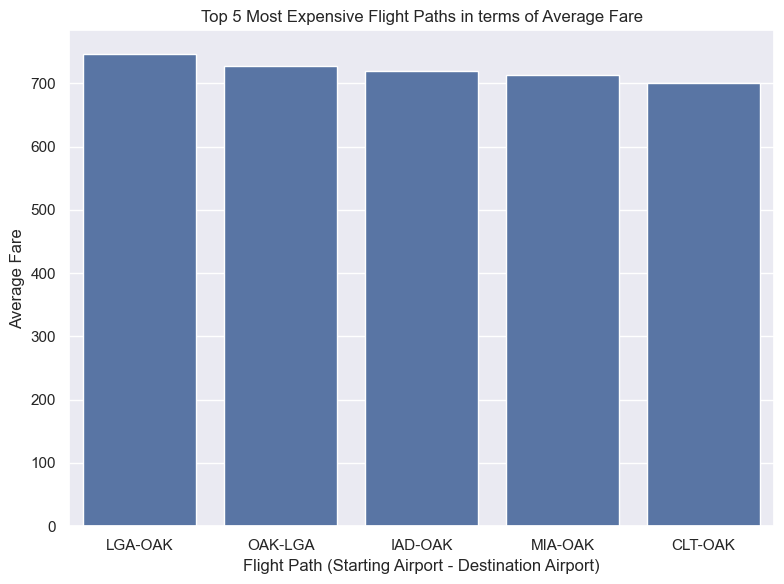

In [63]:
airtravel_df['flightPath'] = airtravel_df['startingAirport'] + '-' + airtravel_df['destinationAirport']

# Calculate average fare for each flight path
avg_fare_by_flight_path = airtravel_df.groupby('flightPath')['totalFare'].mean().reset_index()

# Sort flight paths by average fare in descending order
sorted_flight_paths = avg_fare_by_flight_path.sort_values(by='totalFare', ascending=False)

# Select the top 5 flight paths
top_5_flight_paths = sorted_flight_paths.head(5)

# Set the style of the plot
sns.set(style="darkgrid")

# Create a bar plot for top 5 flight paths and their average fares
plt.figure(figsize=(8, 6))
sns.barplot(x='flightPath', y='totalFare', data=top_5_flight_paths)

# Set labels and title
plt.ylabel('Average Fare')
plt.xlabel('Flight Path (Starting Airport - Destination Airport)')
plt.title('Top 5 Most Expensive Flight Paths in terms of Average Fare')

# Show the plot
plt.tight_layout()
plt.show()